CONTEST: In groups of 2 students, please try to develop a statistically valid predictor of CDRGLOB via using feature engineering. This means you need to work on the numeric values of the features (variables/colomns) by performing multiplications and/or division operations. One such instance is BMI in which we divide weight by height square to get a good indicator of health (skinny,normal,very obese etc.). Thus, you should provide a mathematical formula and you should provide arguments and statistical analyses for tge validation of your formula.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("Temporary_data3_-_Copy.xlsx")
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


In [ ]:
a = data.corr()
a = pd.DataFrame(data=a)
a = a.iloc[16,:] # CDRGLOB ile korelasyonları tek listede aldım
a

SEX        -0.180540
EDUC       -0.140977
MARISTAT   -0.141259
INDEPEND    0.693881
RESIDENC    0.047407
              ...   
RSUPTEMM   -0.348159
RSUPMAR    -0.164707
RSUPMARM   -0.268851
RTRTEM     -0.120294
RTRTEMM    -0.172810
Name: CDRGLOB, Length: 192, dtype: float64

In [ ]:
b= list()
c = []
for i in range(192): #liste uzunluğu 192
  if (a.iloc[i] > 0.40) or (a.iloc[i] < (-0.40)): #Önemli korelasyonları almak için kayda değer olan en küçük negatif ve pozitifleri görmek istiyorum
    b.append(a.iloc[i]) 
    c.append(i) #index no

  else:
    continue

b #korelasyon değerleri

[0.693881441068507,
 1.0,
 0.448557906906442,
 -0.7466604954702506,
 -0.4490687655921006,
 -0.44218473687743903,
 -0.42406795503177025,
 0.4140328348985458,
 0.40680634500294977,
 0.42020393728247973,
 -0.45364582271109466,
 -0.47820726551581083]

In [ ]:
c #indexler

[3, 16, 23, 31, 44, 50, 51, 52, 53, 54, 75, 137]

In [ ]:
a = a.iloc[c]
a #ilgili korelasyon değerlerine karşılık gelen kolon isimleri

INDEPEND    0.693881
CDRGLOB     1.000000
APA         0.448558
NACCMMSE   -0.746660
HIPPOVOL   -0.449069
LHIPPO     -0.442185
RHIPPO     -0.424068
LLATVENT    0.414033
RLATVENT    0.406806
LATVENT     0.420204
LENTM      -0.453646
RENTM      -0.478207
Name: CDRGLOB, dtype: float64

In [ ]:
a = a.abs()
a #çarpma ve bölme gibi işlemler kullanarak formülasyon yapacağım için hepsinin mutlak değerini aldım

INDEPEND    0.693881
CDRGLOB     1.000000
APA         0.448558
NACCMMSE    0.746660
HIPPOVOL    0.449069
LHIPPO      0.442185
RHIPPO      0.424068
LLATVENT    0.414033
RLATVENT    0.406806
LATVENT     0.420204
LENTM       0.453646
RENTM       0.478207
Name: CDRGLOB, dtype: float64

In [ ]:
data[a.index].head(10)

,INDEPEND,CDRGLOB,APA,NACCMMSE,HIPPOVOL,LHIPPO,RHIPPO,LLATVENT,RLATVENT,LATVENT,LENTM,RENTM
0,1,0,0,30,6.9900,3.5363,3.4538,8.3738,6.8119,15.1875,3.3557,3.5253
1,1,2,0,19,5.8700,3.2000,2.6700,25.5100,56.3300,81.8500,3.1700,2.3400
2,1,0,0,29,6.4400,3.1800,3.2600,4.0300,3.9000,7.9300,3.5300,3.5100
3,1,0,0,30,6.9100,3.5300,3.3800,9.0400,10.8300,19.8800,2.8800,3.2900
4,1,1,0,27,5.8463,2.8706,2.9756,38.7750,38.4131,77.1900,2.1765,2.4244
5,1,0,0,29,6.8700,3.3500,3.5100,18.6600,19.9300,38.6000,3.8400,3.7400
6,1,0,0,28,6.4600,3.0800,3.3800,17.0300,14.2300,31.2600,3.6000,2.9500
7,2,1,0,26,7.1900,3.4800,3.7000,23.7500,16.5600,40.3100,3.5300,3.8500
8,1,1,0,27,3.7400,1.8800,1.8600,25.7100,25.7600,51.4700,2.6400,2.5700
9,1,1,0,28,5.6057,3.0251,2.5806,10.2587,14.6980,24.9567,3.3854,3.5987


In [ ]:
# Üstteki tabloyu incelediğimde bazı değerlerin çok yüksek olabildiğini, bazılarının ise çok düşük hatta sıfır bile olabildiğini gördüm

data["My Formula"] = (
((data["INDEPEND"])**10) #Çok küçük bir değer olup yüksek korelasyona sahip olduğu için onuncu kuvvetini aldım
*(((data["APA"]+0.0001)**(0.5))) # Sıfır olabileceği ve çarpma işlemi yaptığım için yutan elemana dönüşmemesi için küçük bir sabit ekledim
/ (data["NACCMMSE"]**12) #Yüksek değer olmasına rağmen korelasyon oranının yüksek olması ve bir test sonucu olması nedeniyle yüksek aldım
/ (data["HIPPOVOL"]**2)
/ (data["LHIPPO"]**2)
/ (data["RHIPPO"]**2)
* (data["LLATVENT"]**(0.5))
* (data["RLATVENT"]**(0.5))
* (data["LATVENT"]**(0.5))
/ (data["LENTM"]**2)
/ (data["RENTM"]**2)
) # Üstte kalan diğer değerler için önceki bölümde yer alan tablodaki sayısal değerlerinin büyüklüklerini baz aldım.

data["My Formula"].head(10)



0    5.429729e-25
1    1.119547e-20
2    4.611271e-25
3    1.360304e-24
4    3.253482e-22
5    2.515963e-24
6    7.347828e-24
7    8.534883e-21
8    1.562345e-21
9    9.293529e-24
Name: My Formula, dtype: float64

In [ ]:
logdata = list()
for i in range(1354): #Çarpma ve bölme işlemi sonucunda bazı hasta değerleri birbirlerine göre 
                      #aşırı küçük veya büyük olabildiği için ortak tabanda göstermek için logaritma aldım.
  logdata.append(np.log(data["My Formula"][i]))


data["My Formula"] = logdata
print("Is there any NaN Variable: ", data["My Formula"].isnull().any())

data.iloc[:,-1].head(10)

Is there any NaN Variable:  False


0   -55.872738
1   -45.938778
2   -56.036124
3   -54.954334
4   -49.477146
5   -54.339387
6   -53.267637
7   -46.210125
8   -47.908099
9   -53.032724
Name: My Formula, dtype: float64

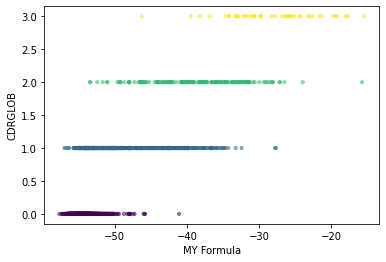

In [ ]:
plt.scatter(data["My Formula"],data["CDRGLOB"], s=10, cmap="viridis", alpha=0.5, c=data["CDRGLOB"])
plt.xlabel("MY Formula")
plt.ylabel("CDRGLOB")
plt.show()

In [ ]:
data[['CDRGLOB','My Formula']].corr()

,CDRGLOB,My Formula
CDRGLOB,1.000000,0.814723
My Formula,0.814723,1.000000
